### POSTTEST 6 UNSUPERVISED LEARNING

### Import Package yang di gunakan

In [1]:
#import package matplotlib
import matplotlib.pyplot as plt
#import package seaborn
import seaborn as sns
#import package pandas
import pandas as pd
#import package numpy
import numpy as np
# untuk data cleaning
from sklearn.impute import SimpleImputer #substitusi nilai
# untuk kmeans clustering
from sklearn.cluster import KMeans

### Membaca dataset 'Womens Clothing E-Commerce Reviews.csv'

In [2]:
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


### Melihat informasi yang terdapat di dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


### Melihat jumlah record yang terdapat pada setiap atribut serta type data nya

In [4]:
df.isna().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

### Melihat panjang dari dataset

In [5]:
print(f'panjang dataset {len(df)} baris')

panjang dataset 23486 baris


### Membaca dataset 'bank-additional-full.csv'

In [6]:
df2 = pd.read_csv('bank-additional-full.csv')
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


# DATA CLEANING

In [7]:
dataset_ns = df.copy()

In [8]:
imputer_mean = SimpleImputer(strategy = 'mean')
imputer_median = SimpleImputer(strategy= 'median')
imputer_modus = SimpleImputer(strategy = 'most_frequent')

### Modus

In [9]:
dataset_ns['Title'] = imputer_modus.fit_transform(dataset_ns[['Title']])

dataset_ns.isna().sum()

Unnamed: 0                   0
Clothing ID                  0
Age                          0
Title                        0
Review Text                845
Rating                       0
Recommended IND              0
Positive Feedback Count      0
Division Name               14
Department Name             14
Class Name                  14
dtype: int64

### Mean

In [10]:
dataset_ns['Age'] = imputer_mean.fit_transform(dataset_ns[['Age']])

dataset_ns.isna().sum()

Unnamed: 0                   0
Clothing ID                  0
Age                          0
Title                        0
Review Text                845
Rating                       0
Recommended IND              0
Positive Feedback Count      0
Division Name               14
Department Name             14
Class Name                  14
dtype: int64

### Menghapus Record

In [11]:
dataset_ns.dropna(inplace=True)

dataset_ns.isna().sum()

Unnamed: 0                 0
Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

In [12]:
len(dataset_ns)

22628

### Menghapus Data Duplikat

In [13]:
dataset_duplicate = df2.copy()

dataset_duplicate.duplicated().sum()

12

In [14]:
dataset_duplicate.drop_duplicates(inplace=True)

dataset_duplicate.duplicated().sum()

0

### K-MEANS CLUSTERING

In [15]:
dk = df.copy()

In [16]:
model = KMeans(n_clusters = 5)

In [17]:
points = dk[['Age','Rating']]

In [18]:
model.fit(points)

KMeans(n_clusters=5)

In [19]:
labels = model.labels_

In [20]:
labels

array([1, 1, 0, ..., 3, 3, 0])

In [21]:
X = points ['Age']
Y = points ['Rating']

In [22]:
centroids = model.cluster_centers_

In [23]:
centroids_X = centroids[:,0]
centroids_Y = centroids[:,1]

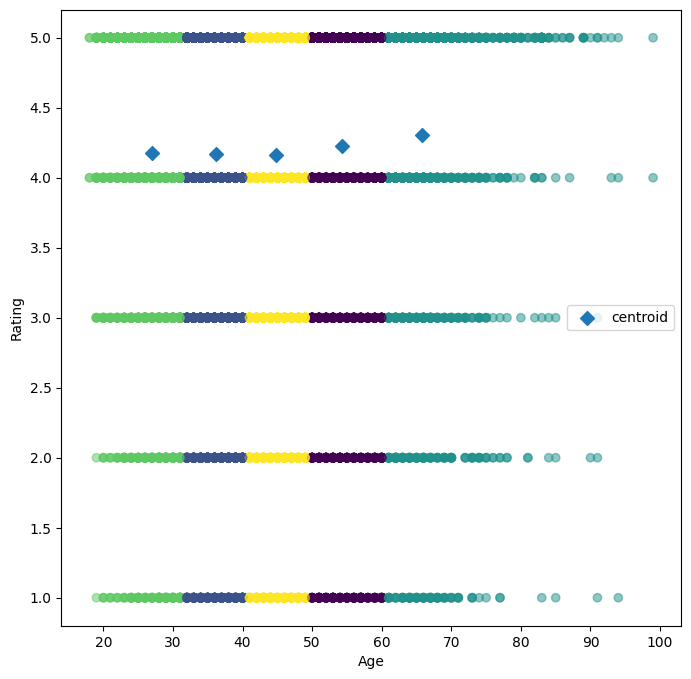

In [24]:
plt.figure(figsize = (8,8))
plt.scatter(X,Y, alpha = 0.5, c = labels)
plt.scatter(centroids_X, centroids_Y, marker = 'D', s = 50, label = 'centroid')
plt.xlabel('Age')
plt.ylabel('Rating')
plt.legend()
plt.show()

In [25]:
kluster_range = range(1, 9)
inertias = []
for k in kluster_range:
    model = KMeans(n_clusters = k)
    model.fit(points)
    inertias.append(model.inertia_)

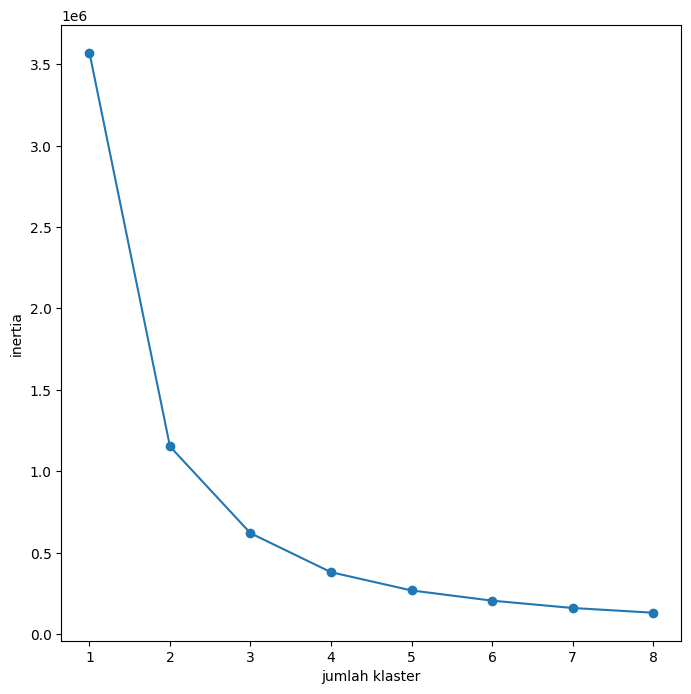

In [26]:
plt.figure(figsize = (8,8))
plt.plot(kluster_range,inertias, '-o')
plt.xlabel('jumlah klaster')
plt.ylabel('inertia')
plt.xticks(kluster_range)
plt.show()